<u> Task-03 :</u>
CIN: PIT/JUN24/17544

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [1]:
# Kaggle api
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 241MB/s]
100% 1.06G/1.06G [00:08<00:00, 138MB/s]


In [3]:
!ls

dogs-vs-cats.zip  sample_data


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
#SVM model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 107ms/step - loss: 1.4832 - accuracy: 0.5804 - val_loss: 0.6656 - val_accuracy: 0.5982
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6198 - accuracy: 0.6619 - val_loss: 0.6562 - val_accuracy: 0.5894
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5658 - accuracy: 0.7185 - val_loss: 0.5221 - val_accuracy: 0.7480
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4832 - accuracy: 0.7650 - val_loss: 0.5287 - val_accuracy: 0.7394
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4289 - accuracy: 0.8015 - val_loss: 0.5881 - val_accuracy: 0.7154
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3625 - accuracy: 0.8372 - val_loss: 0.4629 - val_accuracy: 0.7882
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2837 - accuracy: 0.8785 - val_loss: 0.5814 - val_ac

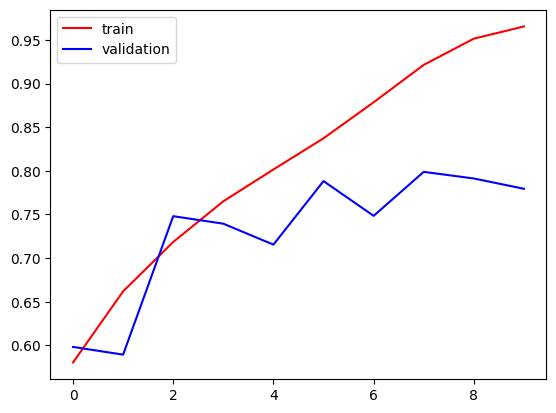

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [26]:
import cv2
from PIL import Image
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

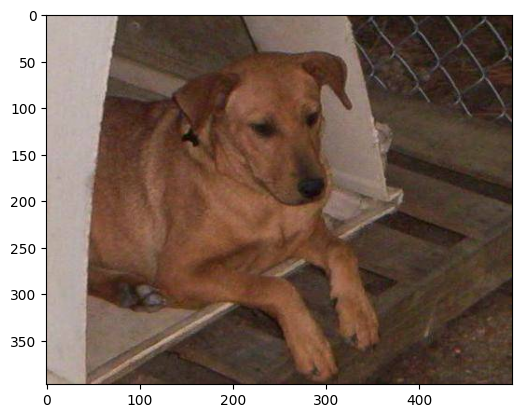

In [29]:
# display dog image
test_img = mpimg.imread('/content/test/dogs/dog.100.jpg')
imgplt = plt.imshow(test_img)
plt.show()

In [30]:
test_img.shape

(397, 500, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[1.]], dtype=float32)

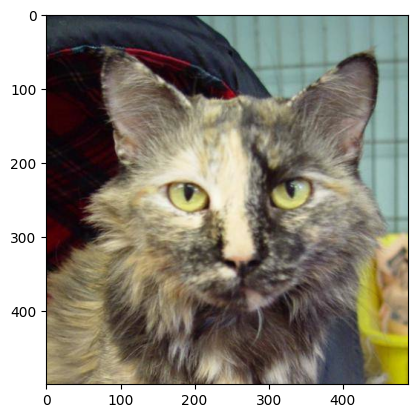

In [35]:
# display cat image
test_img2 = mpimg.imread('/content/test/cats/cat.10.jpg')
imgplt = plt.imshow(test_img)
plt.show()

In [36]:
test_img2.shape

(499, 489, 3)

In [37]:
test_img2 = cv2.resize(test_img2,(256,256))

In [38]:
test_input2 = test_img2.reshape((1,256,256,3))

In [39]:
model.predict(test_input2)

1/1 [==============================] - 0s 37ms/step


array([[1.]], dtype=float32)